In [1]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.io import  importer
from quetzal.model import stepmodel

%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

SQLalchemy is not installed. No support for SQL output.


In [2]:
training_folder = '../../'
input_folder = training_folder + r'/inputs/'

# rail

In [3]:
lines = gpd.read_file(input_folder+'sandbox/sandbox.geojson').set_index('id')
lines['geometry'] = lines['geometry'].apply(lambda g: g[0])

In [4]:
plt.rcParams['figure.figsize'] =[16, 9]

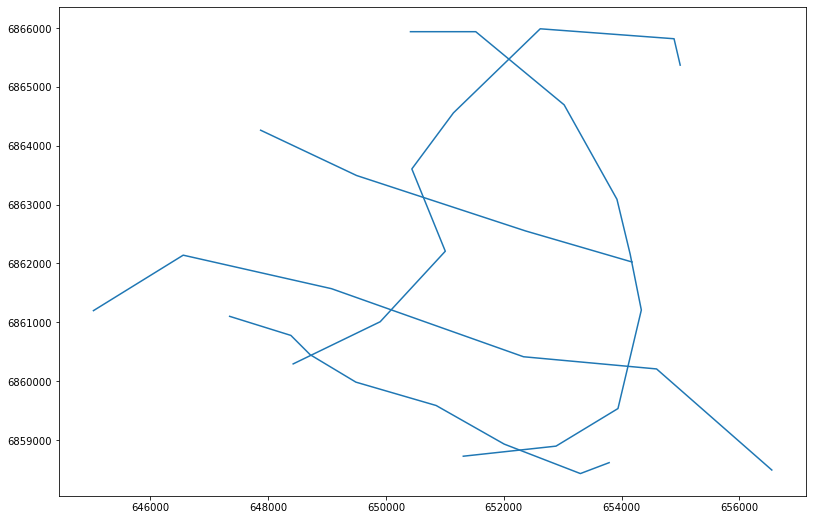

In [5]:
lines.plot()

In [16]:
lines['name'] = 'matt'
links, nodes = importer.from_lines(lines, add_return=True,)

In [17]:
links

,a,b,link_sequence,direction_id,geometry,line,trip_id,route_id
0,0,1,0,0,LINESTRING (647332.1856340367 6861105.51013652...,3,3_bis,3
1,1,2,1,0,LINESTRING (648384.5049222632 6860777.73855495...,3,3_bis,3
2,2,3,2,0,LINESTRING (648712.276503842 6860449.966973371...,3,3_bis,3
3,3,4,3,0,LINESTRING (649488.5776181075 6859984.18630481...,3,3_bis,3
4,4,5,4,0,LINESTRING (650851.4173520404 6859587.41017974...,3,3_bis,3
5,5,6,5,0,LINESTRING (652007.2434555024 6858931.86701658...,3,3_bis,3
6,6,7,6,0,LINESTRING (653301.0786459449 6858431.58407628...,3,3_bis,3
7,7,6,0,1,LINESTRING (653801.3615862494 6858621.34657087...,3,3,3
8,6,5,1,1,LINESTRING (653301.0786459449 6858431.58407628...,3,3,3
9,5,4,2,1,LINESTRING (652007.2434555024 6858931.86701658...,3,3,3


In [18]:
links['route_type'] = 1
links['route_color'] = "#D22328" # rouge systra
links['time'] = 150
sm = stepmodel.StepModel(epsg=2154, coordinates_unit='meter')
sm.links, sm.nodes = links, nodes

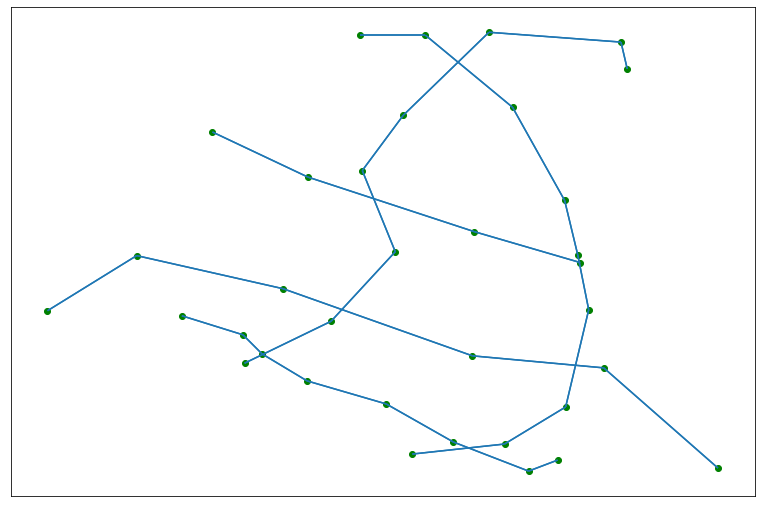

In [19]:
ax = sm.plot('links')
sm.plot('nodes', ax=ax, color='green')

In [17]:
sm.integrity_fix_collision()

In [ ]:
sm.int

In [18]:
sm.to_zip(training_folder + r'model/preparation/sandbox.zip')

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 22.81it/s]
